In [1]:
import xarray as xr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import functions.eddy_feedback as ef

In [2]:
df = pd.read_csv('./data/regridded_3x3_efp.csv', index_col=0)
df

,model,efp_nh,efp_sh
0,CESM1-WACCM-SC,0.1421,0.0303
1,CESM2,0.4132,0.3714
2,CNRM-CM6-1,0.2771,0.2492
3,CanESM5,0.4446,0.4808
4,E3SMv1,0.0589,0.0588
5,EC-EARTH3,0.3467,0.3621
6,ECHAM6.3,0.0144,0.0104
7,FGOALS-f3-L,0.2642,0.1512
8,HadGEM3-GC31-LL,0.3168,0.3412
9,HadGEM3-GC31-MM,0.3757,0.3621


In [3]:
ep_flux_freq = {
    "CESM2": "30 min",
    "CanESM5": "6-hourly",
    "CNRM-CM6-1": "daily",
    "E3SMv1": "daily",
    "EC-EARTH3": "6-hourly",
    "ECHAM6.3": "6-hourly",
    "FGOALS-f3-L": "daily",
    "HadGEM3-GC31-MM": "20 min",
    "HadGEM3-GC31-LL": "20 min",
    "IPSL-CM6A-LR": "daily",
    "MIROC6": "daily",
    "NorESM2-LM": "30 min",
    "OpenIFS-159": "6-hourly",
    "OpenIFS-511": "6-hourly",
    "CESM1-WACCM-SC": "daily"
}

# Create a DataFrame from the dictionary
df_freq = pd.DataFrame(list(ep_flux_freq.items()), columns=["model", "EP flux freq."])
df_freq = df_freq[df_freq["model"].isin(df["model"])]
# df_freq

# # Merge with feedback DataFrame
df_com = pd.merge(df, df_freq, on="model", how="left")
df_com

,model,efp_nh,efp_sh,EP flux freq.
0,CESM1-WACCM-SC,0.1421,0.0303,daily
1,CESM2,0.4132,0.3714,30 min
2,CNRM-CM6-1,0.2771,0.2492,daily
3,CanESM5,0.4446,0.4808,6-hourly
4,E3SMv1,0.0589,0.0588,daily
5,EC-EARTH3,0.3467,0.3621,6-hourly
6,ECHAM6.3,0.0144,0.0104,6-hourly
7,FGOALS-f3-L,0.2642,0.1512,daily
8,HadGEM3-GC31-LL,0.3168,0.3412,20 min
9,HadGEM3-GC31-MM,0.3757,0.3621,20 min


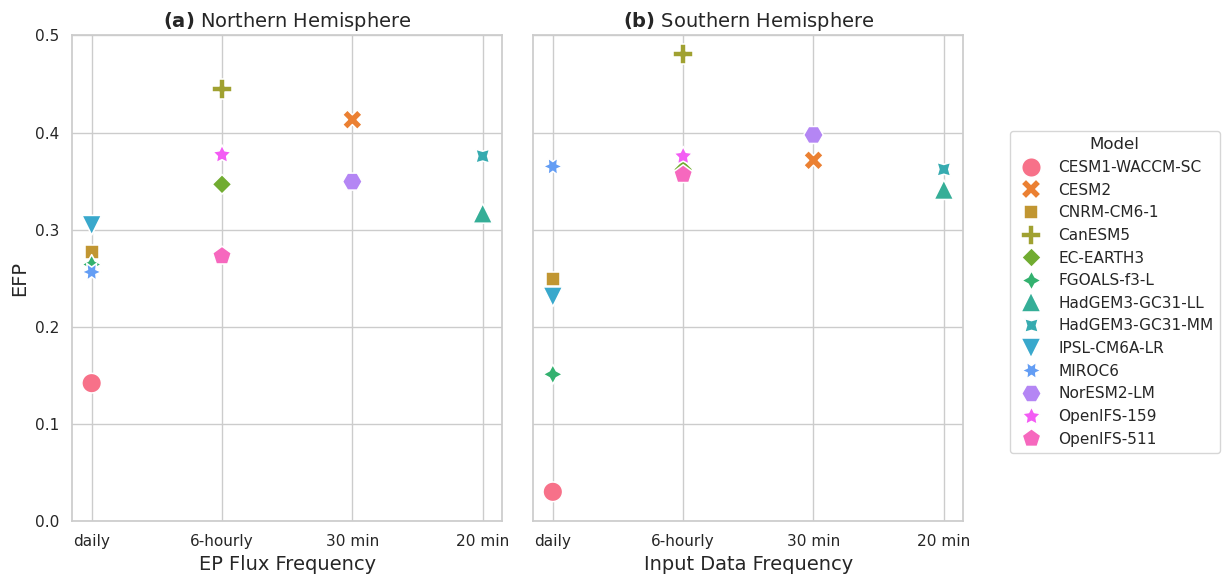

In [4]:
# Filter dataframe
df = df_com.drop(index=[4, 6])
# df = df_com

# Set custom order for EP flux frequency
freq_order = ['daily', '6-hourly', '30 min', '20 min']
df['EP flux freq.'] = pd.Categorical(df['EP flux freq.'], categories=freq_order, ordered=True)

# Plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

# Plot EFP NH
sns.scatterplot(ax=axes[0], data=df, x='EP flux freq.', y='efp_nh',
                hue='model', style='model', s=200)
axes[0].set_title("$\\bf{(a)}$ Northern Hemisphere", fontsize=14)
axes[0].set_ylabel("EFP", fontsize=14)
axes[0].set_xlabel("EP Flux Frequency", fontsize=14)
axes[0].set_ylim(0, 0.5)

# Plot EFP SH
sns.scatterplot(ax=axes[1], data=df, x='EP flux freq.', y='efp_sh',
                hue='model', style='model', s=200)
axes[1].set_title("$\\bf{(b)}$ Southern Hemisphere", fontsize=14)
axes[1].set_ylabel("EFP")
axes[1].set_xlabel("Input Data Frequency", fontsize=14)
axes[1].set_ylim(0, 0.5)

# Adjust legend (put outside right subplot)
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.01, 0.5),
           title='Model')
axes[0].legend_.remove()
axes[1].legend_.remove()

plt.tight_layout()
plt.show()


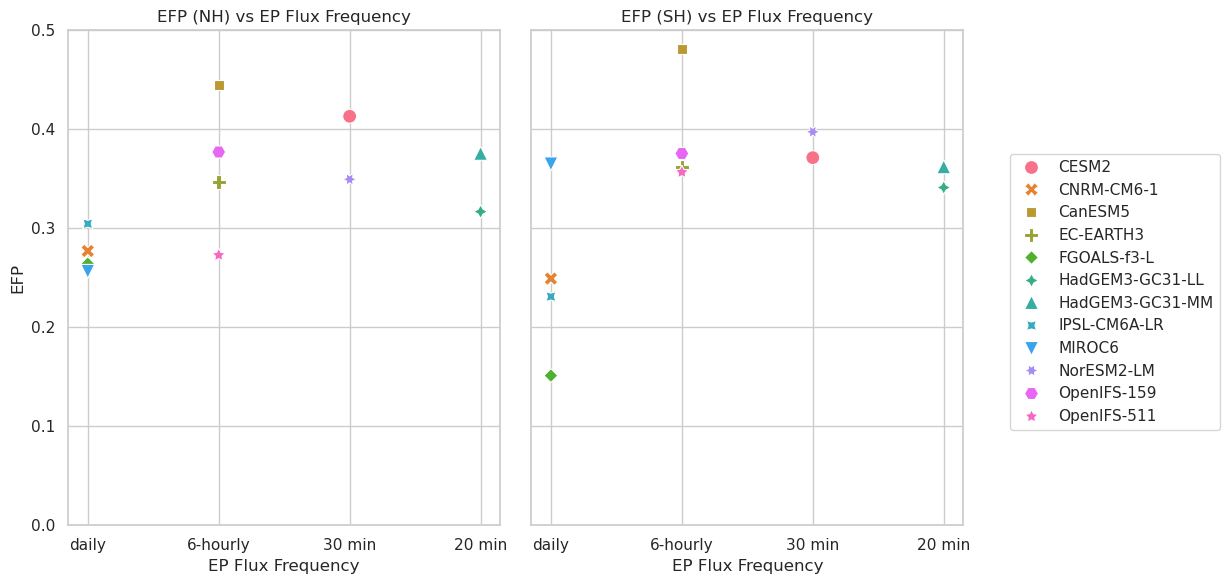

In [5]:
# Filter dataframe
df = df_com.drop(index=[0, 4, 6])
# df = df_com

# Set custom order for EP flux frequency
freq_order = ['daily', '6-hourly', '30 min', '20 min']
df['EP flux freq.'] = pd.Categorical(df['EP flux freq.'], categories=freq_order, ordered=True)

# Plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

# Plot EFP NH
sns.scatterplot(ax=axes[0], data=df, x='EP flux freq.', y='efp_nh',
                hue='model', style='model', s=100)
axes[0].set_title("EFP (NH) vs EP Flux Frequency")
axes[0].set_ylabel("EFP")
axes[0].set_xlabel("EP Flux Frequency")
axes[0].set_ylim(0, 0.5)

# Plot EFP SH
sns.scatterplot(ax=axes[1], data=df, x='EP flux freq.', y='efp_sh',
                hue='model', style='model', s=100)
axes[1].set_title("EFP (SH) vs EP Flux Frequency")
axes[1].set_ylabel("EFP")
axes[1].set_xlabel("EP Flux Frequency")
axes[1].set_ylim(0, 0.5)

# Adjust legend (put outside right subplot)
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.01, 0.5))
axes[0].legend_.remove()
axes[1].legend_.remove()

plt.tight_layout()
plt.show()


# Reanalysis

In [6]:
path_6h = '/home/links/sit204/project_specific_codes/aostools/jra55/1958_2016/6hourly/yearly_data'
jra_6h = xr.open_mfdataset(os.path.join(path_6h, '*_daily_averages.nc'))
jra_6h

OSError: no files to open